# EDA with SQL

In [ ]:
!pip install sqlalchemy


In [ ]:
!pip install ipython-sql

In [33]:
%load_ext sql
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [34]:
%sql sqlite:///my_data1.db

In [35]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [36]:
# remove blank rows from table


%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [37]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [38]:
# Displaying the names of the unique launch sites in the space mission
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTBL;


 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [39]:
# Displaying 5 records where launch sites begin with the string 'CCA'
%sql SELECT * FROM SPACEXTBL WHERE "Launch_Site" LIKE 'CCA%' LIMIT 5;


 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [40]:
# Displaying the total payload mass carried by boosters launched by NASA (CRS)
%sql SELECT SUM("Payload_Mass_kg") AS Total_Payload_Mass FROM SPACEXTBL WHERE "Launch_Provider" = 'NASA (CRS)';


 * sqlite:///my_data1.db
(sqlite3.OperationalError) no such column: Payload_Mass_kg
[SQL: SELECT SUM(Payload_Mass_kg) AS Total_Payload_Mass FROM SPACEXTBL WHERE Launch_Provider = 'NASA (CRS)' ;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [41]:
 # Displaying the average payload mass carried by booster version F9 v1.1
%sql SELECT AVG("Payload_Mass_kg") AS Average_Payload_Mass FROM SPACEXTBL WHERE "Booster_Version" = 'F9 v1.1';


 * sqlite:///my_data1.db
(sqlite3.OperationalError) no such column: Payload_Mass_kg
[SQL: SELECT AVG(Payload_Mass_kg) AS Average_Payload_Mass FROM SPACEXTBL WHERE Booster_Version = 'F9 v1.1' ;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [42]:
#  Listing the date when the first successful landing outcome in the ground pad was achieved.
%sql SELECT MIN("Date") AS First_Successful_Landing_Date FROM SPACEXTBL WHERE "Landing_Outcome" = 'Success (ground pad)';


 * sqlite:///my_data1.db
Done.


First_Successful_Landing_Date
2015-12-22


In [43]:
# Listing the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
%sql SELECT DISTINCT "Booster_Version" FROM SPACEXTBL WHERE "Landing_Outcome" = 'Success (drone ship)' AND "PAYLOAD_MASS__KG_" > 4000 AND "PAYLOAD_MASS__KG_" < 6000;


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [44]:
# Listing the total number of successful and failure mission outcomes¶
%sql SELECT "Landing_Outcome", COUNT(*) AS Count FROM SPACEXTBL GROUP BY "Landing_Outcome";


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count
Controlled (ocean),5
Failure,3
Failure (drone ship),5
Failure (parachute),2
No attempt,21
No attempt,1
Precluded (drone ship),1
Success,38
Success (drone ship),14
Success (ground pad),9


In [45]:
# Listing the names of the booster_versions which have carried the maximum payload mass. Using a subquery
%sql SELECT "Booster_Version" FROM SPACEXTBL WHERE "PAYLOAD_MASS__KG_" = (SELECT MAX("PAYLOAD_MASS__KG_") FROM SPACEXTBL);


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [46]:
# Listing the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
%sql SELECT strftime('%m', "Date") AS Month,"Landing_Outcome","Booster_Version","Launch_Site" FROM SPACEXTBL WHERE substr("Date", 0, 4) = '2015' AND "Landing_Outcome" LIKE 'Failure (drone ship)';


 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site


In [47]:
# Ranking the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.
%sql SELECT "Landing_Outcome", COUNT(*) AS Count  FROM SPACEXTBL WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY "Landing_Outcome" ORDER BY Count DESC;


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


# Visulization 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


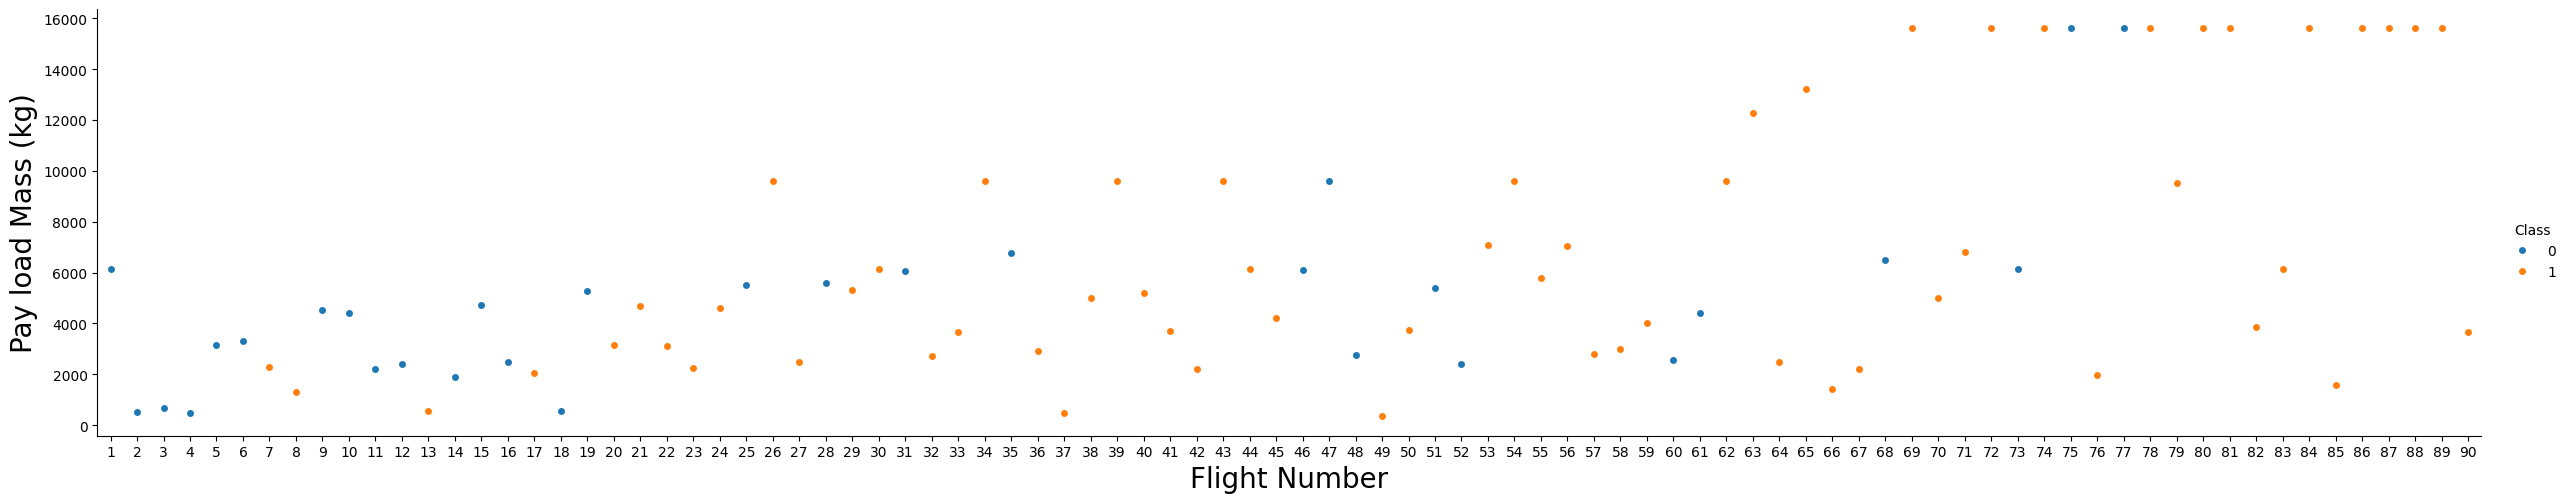

In [50]:
# Plotting out the FlightNumber vs. PayloadMass and overlaying the outcome of the launch. 
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

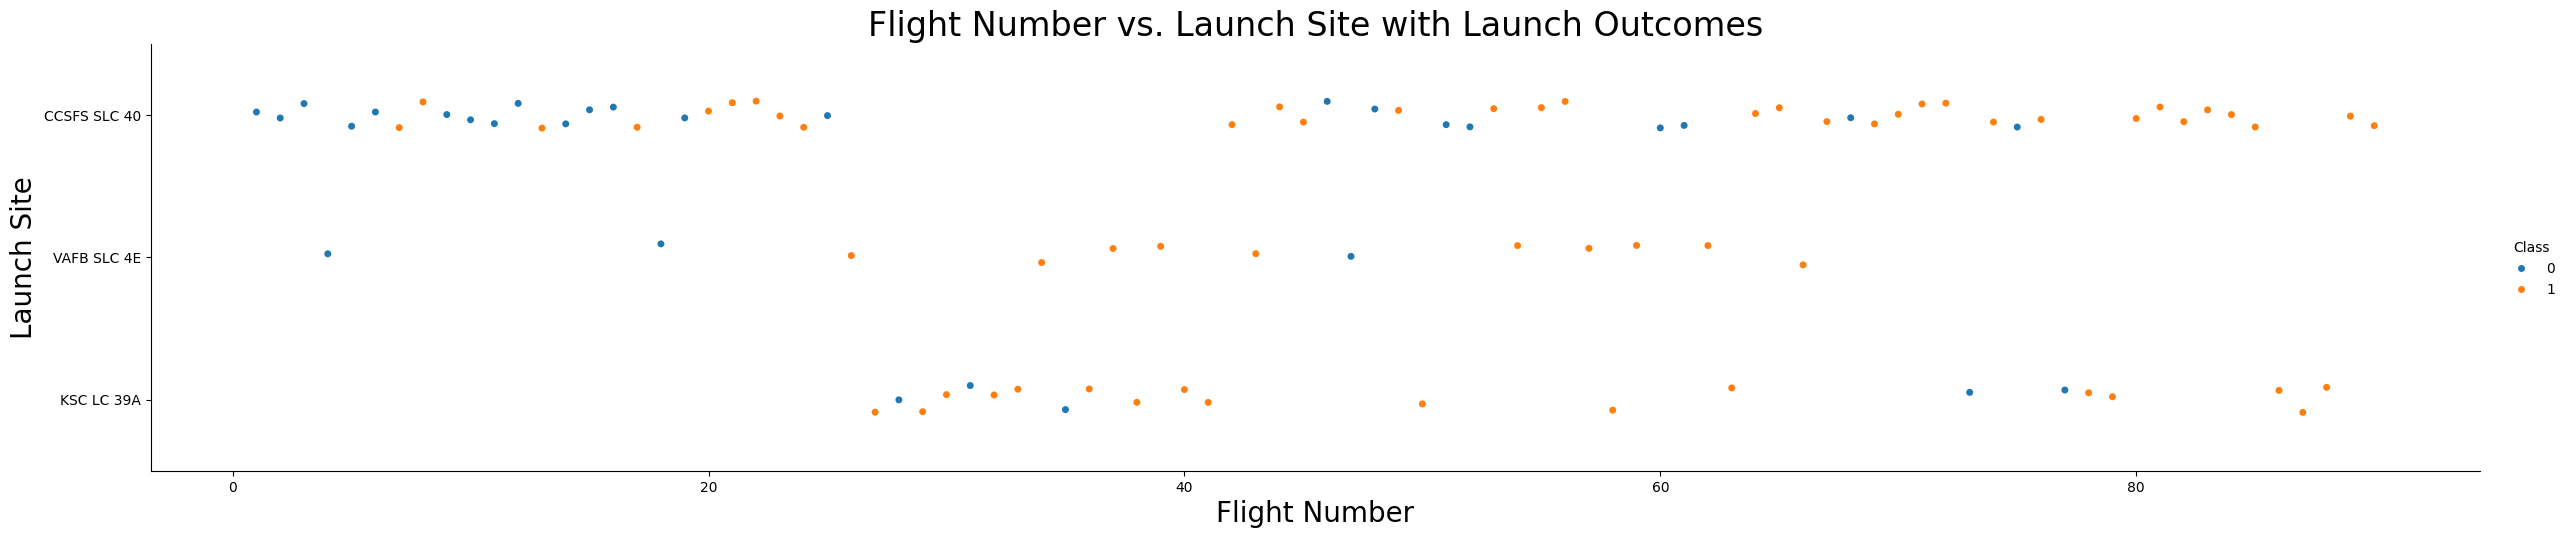

In [51]:
# Visualizing the relationship between Flight Number and Launch Site
sns.catplot(
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class", 
    data=df, 
    aspect=5,
    kind="strip"  
)

plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Flight Number vs. Launch Site with Launch Outcomes", fontsize=24)
plt.show()

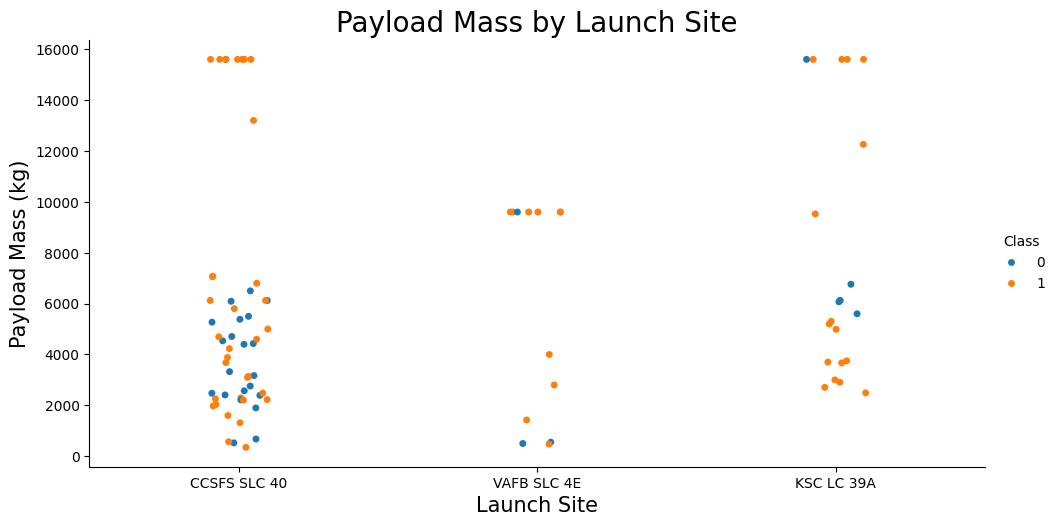

In [52]:
# Visualizing the relationship between Payload Mass and Launch Site
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Launch Site", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.title("Payload Mass by Launch Site", fontsize=20)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4912\4173543872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate, palette='viridis')


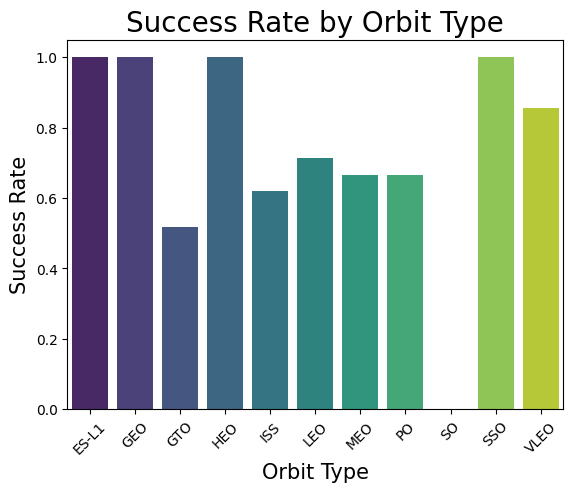

In [53]:
# Visualizing  the relationship between success rate of each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rate.columns = ['Orbit', 'SuccessRate']
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate, palette='viridis')
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=20)
plt.xticks(rotation=45) 
plt.show()

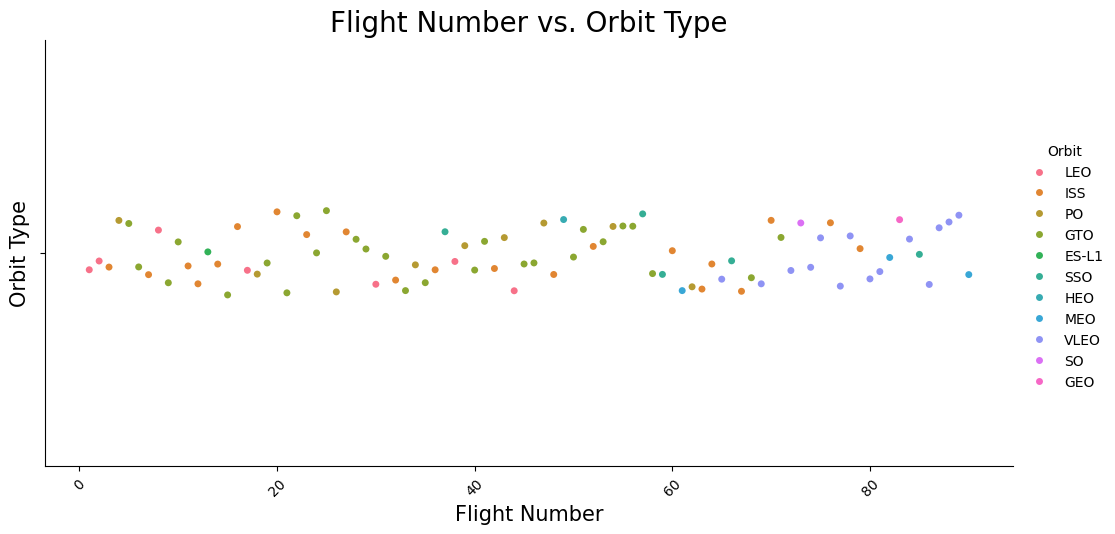

In [54]:
# Visualizing the relationship between FlightNumber and Orbit type
sns.catplot(x='FlightNumber', hue='Orbit', kind='strip', data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs. Orbit Type", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

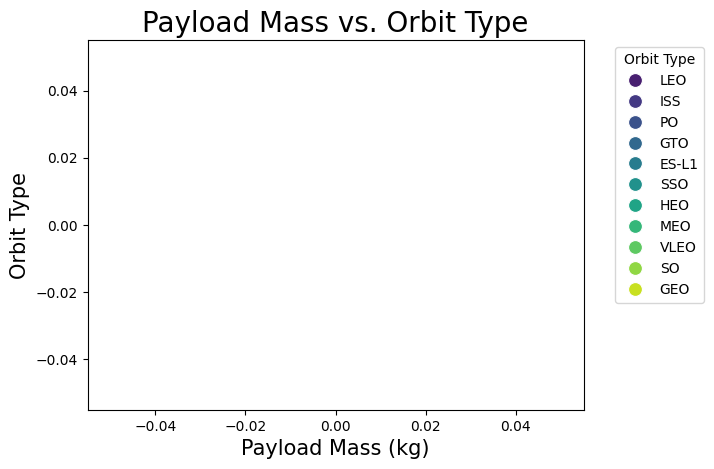

In [55]:
# Visualizing the relationship between Payload Mass and Orbit type
sns.scatterplot(x='PayloadMass', hue='Orbit', data=df, palette='viridis', s=100)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs. Orbit Type", fontsize=20)
plt.legend(title='Orbit Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [56]:
# Visualizing the launch success yearly trend
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


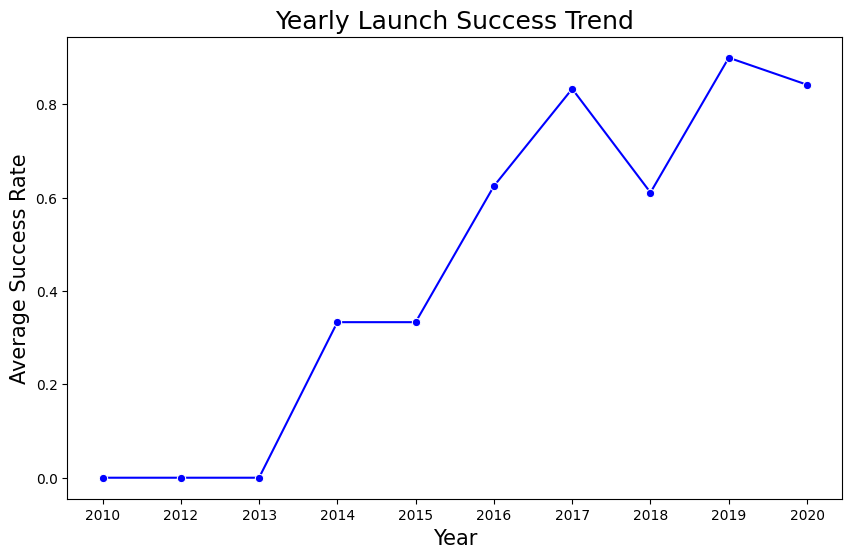

In [58]:
df_yearly_trend = df.groupby('Date')['Class'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Class', data=df_yearly_trend, marker='o', color='b')
plt.title('Yearly Launch Success Trend', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)
plt.show()

## Features Engineering

In [59]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [60]:
# Creating dummy variables to categorical column
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

features_one_hot = pd.get_dummies(features, columns=categorical_columns)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()
features_one_hot.to_csv('dataset_part_3.csv', index=False)